In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import plotly.express as px

<h3>Preprocessing (Loading, removing and showing graphs)</h3>

In [40]:
# Load your CSV dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('/content/drive/MyDrive/ML/Thesis/Dataset/AU-PEMal-2025.csv')

In [41]:
df.head()

,md5,sha1,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
0,d5aa2b2506dd71b65307bb551a6a099d,62f4d55a1bb8396e493d7815dc44febed7161535,67820,144,3,0,4,0,65535,0,...,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign,Benign,Benign
1,8d1178cec97f96a9ede3efe2f30ef30e,ca40945a4e35d48794a5e13aacf16b8ae1caddeb,2477980,144,3,0,4,0,65535,0,...,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign,Benign,Benign
2,c08d7afb7966f452cf5aa9283fe8880a,6f47b50480bea61ae4dfb75c12582990cc5ce770,10878,144,3,0,4,0,65535,0,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
3,3554a3a99e7ffb57552aedcb2520f1d2,8c3d5b506a8d55f42f4c83ead3e4341255d1acfc,412832,144,3,4,0,0,65535,0,...,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign,Benign,Benign
4,5be9511d42136df49d9501680e84109f,0a7d0c68c591db2f197b2169d226bebe6e9bdabe,113070,144,3,0,4,0,65535,0,...,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign


In [42]:
df.shape

(21752, 59)

In [43]:
df.duplicated().sum()

np.int64(49)

In [44]:
df = df.drop_duplicates()

In [45]:
df.shape

(21703, 59)

In [46]:
df2 = df.copy()
df3 = df.copy()

In [33]:
df = df.drop(['md5', 'sha1','Category', 'Family'], axis=1)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns =[ 'Class']
df = pd.DataFrame(df)

In [34]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [35]:
df.isnull().sum()

,0
EntryPoint,0
bytes_on_last_page,0
pages_in_file,0
relocations,0
size_of_header,0
min_extra_paragraphs,0
max_extra_paragraphs,0
init_ss_value,0
init_sp_value,0
init_ip_value,0


##Outliers ##

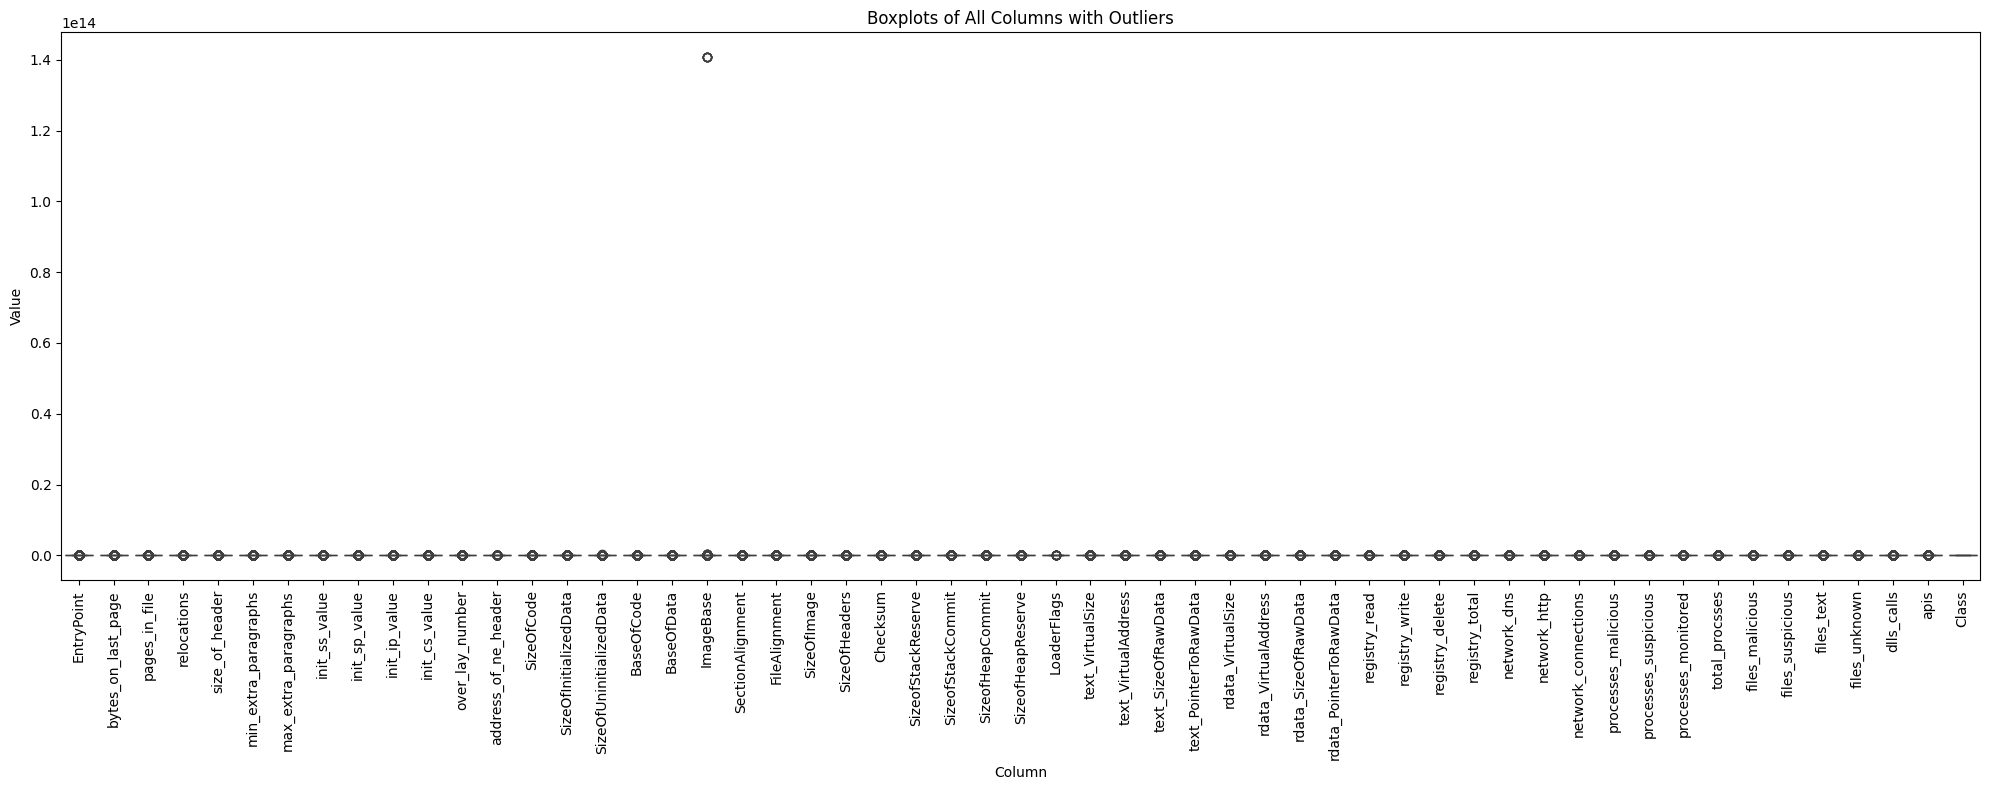

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert wide df (55 columns) into long format
df_melted = df.melt(var_name="Column", value_name="Value")

plt.figure(figsize=(20, 8))  # wider figure to fit all columns on x-axis
sns.boxplot(x="Column", y="Value", data=df_melted)

plt.xticks(rotation=90)  # rotate labels for readability
plt.title("Boxplots of All Columns with Outliers")
plt.tight_layout()
plt.show()


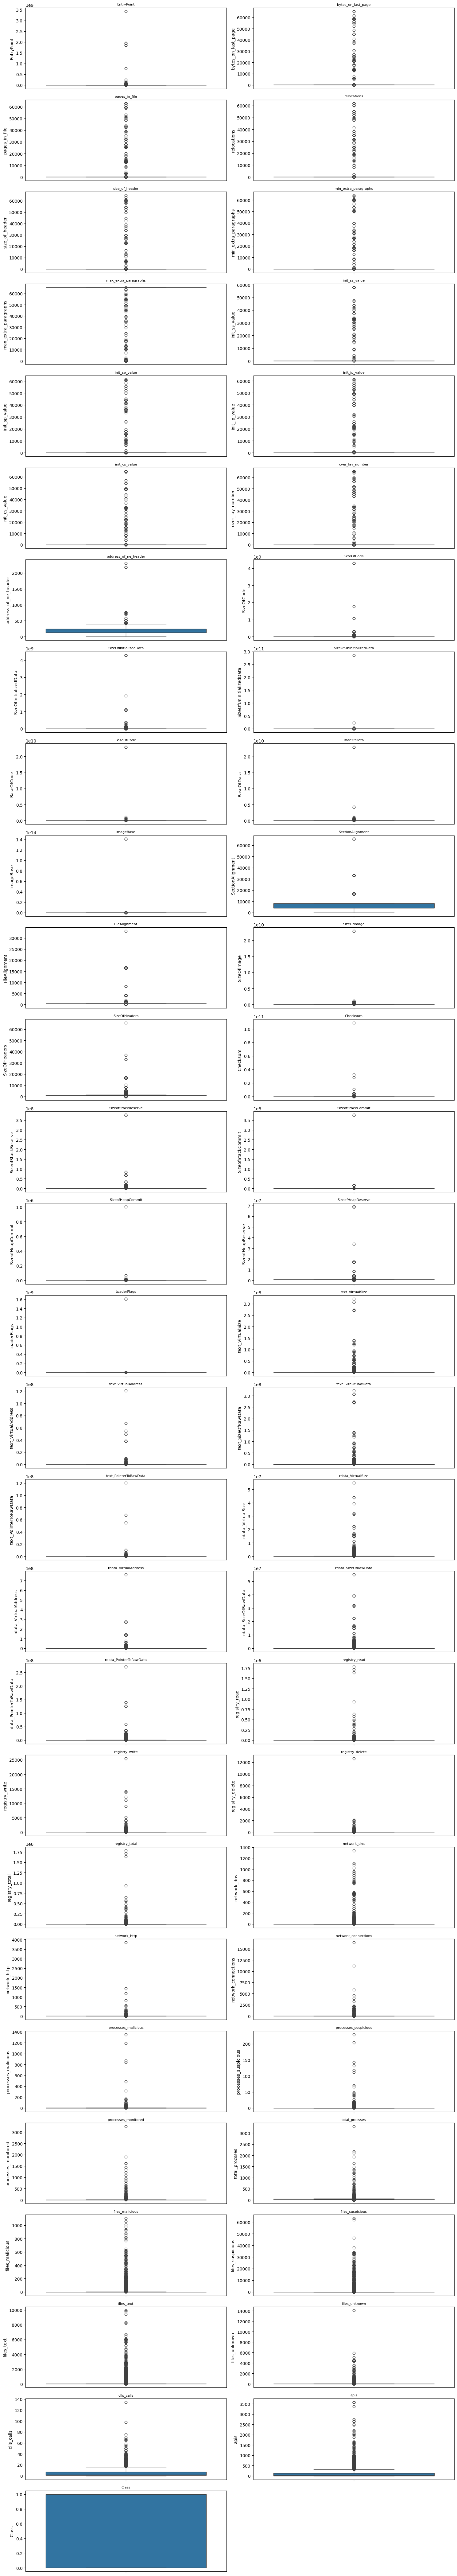

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = 2
n_rows = math.ceil(len(df.columns) / n_cols)

plt.figure(figsize=(15, n_rows * 3))  # 3 height units per row

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(col, fontsize=8)

plt.tight_layout()
plt.show()


##Feature Selection ##

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Mutual Information**

In [21]:
from sklearn.feature_selection import mutual_info_classif
# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']
# Calculate mutual information

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

# Create a DataFrame to show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                    Feature  MI Score
0       processes_malicious  0.646417
1         rdata_VirtualSize  0.463233
2          text_VirtualSize  0.396420
3                EntryPoint  0.360555
4    rdata_PointerToRawData  0.332626
5            registry_total  0.300675
6             registry_read  0.282931
7        text_SizeOfRawData  0.252888
8           files_malicious  0.251678
9       processes_monitored  0.250744
10               SizeOfCode  0.240496
11    SizeOfInitializedData  0.238805
12      rdata_SizeOfRawData  0.226569
13              SizeOfImage  0.223849
14     rdata_VirtualAddress  0.219336
15           total_procsses  0.193710
16         files_suspicious  0.182182
17            files_unknown  0.175180
18               BaseOfData  0.160490
19               files_text  0.155120
20              network_dns  0.131583
21                     apis  0.120013
22             network_http  0.111683
23                 Checksum  0.111619
24           r

In [22]:
top_features = mi_df.head(47)['Feature'].tolist()
print("\n Best 47 Features:")
print(top_features)


 Best 47 Features:
['processes_malicious', 'rdata_VirtualSize', 'text_VirtualSize', 'EntryPoint', 'rdata_PointerToRawData', 'registry_total', 'registry_read', 'text_SizeOfRawData', 'files_malicious', 'processes_monitored', 'SizeOfCode', 'SizeOfInitializedData', 'rdata_SizeOfRawData', 'SizeOfImage', 'rdata_VirtualAddress', 'total_procsses', 'files_suspicious', 'files_unknown', 'BaseOfData', 'files_text', 'network_dns', 'apis', 'network_http', 'Checksum', 'registry_write', 'network_connections', 'address_of_ne_header', 'ImageBase', 'processes_suspicious', 'SizeofStackReserve', 'BaseOfCode', 'text_VirtualAddress', 'SizeofStackCommit', 'bytes_on_last_page', 'SectionAlignment', 'dlls_calls', 'text_PointerToRawData', 'SizeOfHeaders', 'FileAlignment', 'SizeofHeapCommit', 'SizeofHeapReserve', 'SizeOfUninitializedData', 'pages_in_file', 'registry_delete', 'over_lay_number', 'max_extra_paragraphs', 'relocations']


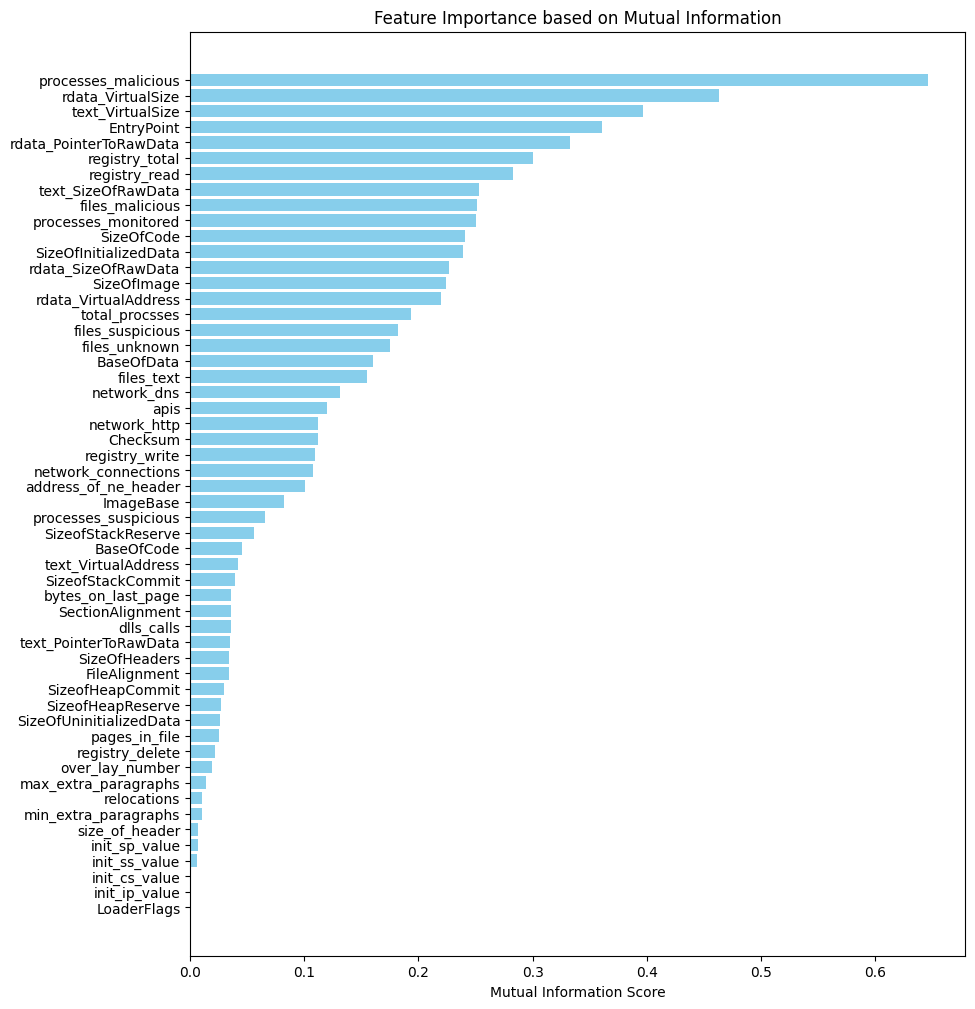

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance based on Mutual Information")
plt.gca().invert_yaxis()
plt.show()

**Wrapper Method: RFE**

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
selector = RFE(model, n_features_to_select=30)
X_new = selector.fit_transform(X,y)
print("Selected features:", selector.support_)
print("Ranking of features:", selector.ranking_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features: [ True  True  True  True False False  True False False False False  True
 False  True  True  True  True  True  True False  True  True False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True False False  True False False False False False False False
 False  True False False False False]
Ranking of features: [ 1  1  1  1  6 10  1 24  4  2  5  1 21  1  1  1  1  1  1  7  1  1 20  1
  1  1  8  1  1  1  1  1  1  1  1  1  1  1 11 22  1 17 19 12 18 23 16 14
 15  1  3  9 25 13]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree / Random Forest**

Feature importances:
Feature 0 (EntryPoint): 0.0069
Feature 1 (bytes_on_last_page): 0.0008
Feature 2 (pages_in_file): 0.0006
Feature 3 (relocations): 0.0001
Feature 4 (size_of_header): 0.0001
Feature 5 (min_extra_paragraphs): 0.0006
Feature 6 (max_extra_paragraphs): 0.0001
Feature 7 (init_ss_value): 0.0000
Feature 8 (init_sp_value): 0.0001
Feature 9 (init_ip_value): 0.0001
Feature 10 (init_cs_value): 0.0000
Feature 11 (over_lay_number): 0.0008
Feature 12 (address_of_ne_header): 0.0060
Feature 13 (SizeOfCode): 0.0040
Feature 14 (SizeOfInitializedData): 0.0036
Feature 15 (SizeOfUninitializedData): 0.0008
Feature 16 (BaseOfCode): 0.0014
Feature 17 (BaseOfData): 0.0029
Feature 18 (ImageBase): 0.0026
Feature 19 (SectionAlignment): 0.0009
Feature 20 (FileAlignment): 0.0024
Feature 21 (SizeOfImage): 0.0047
Feature 22 (SizeOfHeaders): 0.0018
Feature 23 (Checksum): 0.0020
Feature 24 (SizeofStackReserve): 0.0012
Feature 25 (SizeofStackCommit): 0.0010
Feature 26 (SizeofHeapCommit): 0.0004
Feature

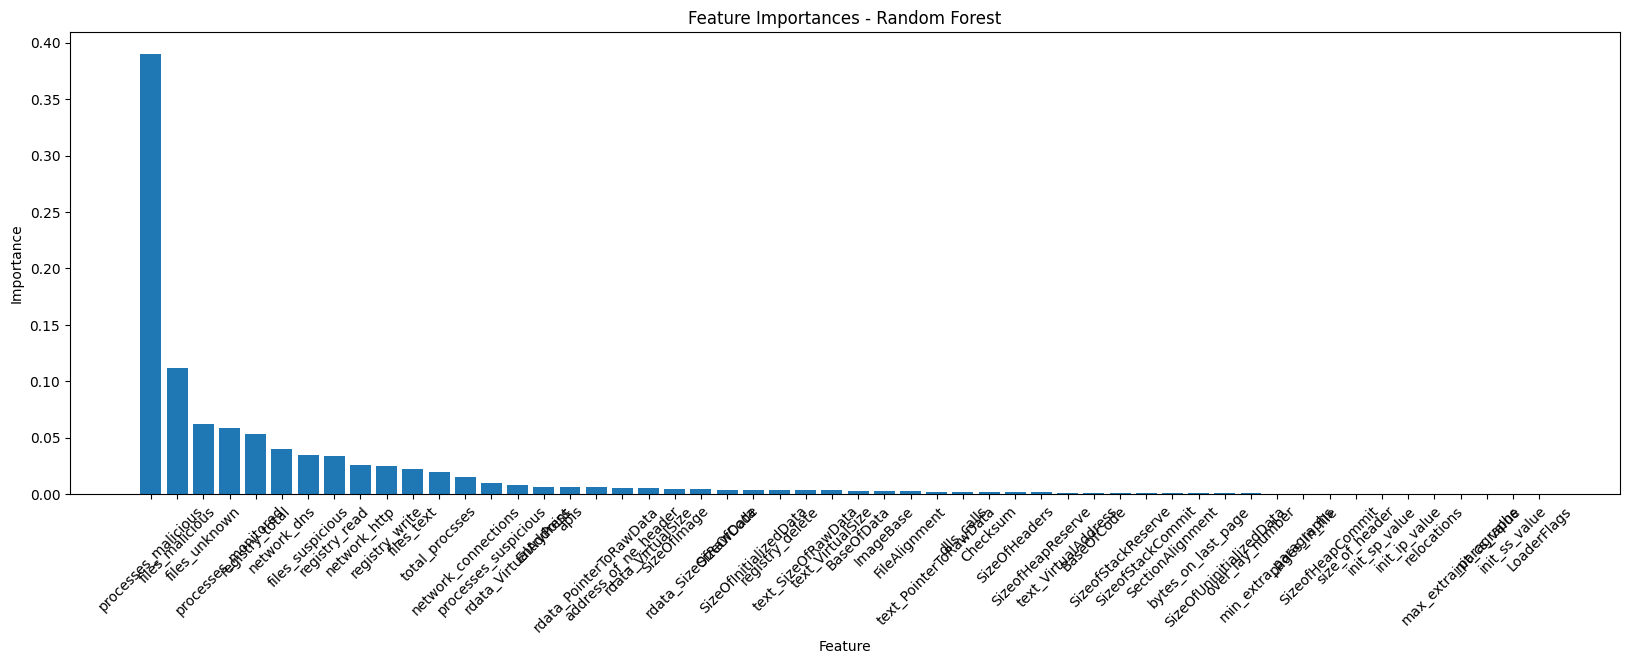

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for i in range(X.shape[1]):
    print(f"Feature {i} ({df.columns[i]}): {importances[i]:.4f}")
plt.figure(figsize=(20, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(df.columns)[indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

**Feature Checking with respect to Category**

In [47]:
df2 = df2.drop(['md5', 'sha1','Family', 'Class'], axis=1)
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns
categorical_columns =[ 'Category']
df2 = pd.DataFrame(df2)

In [48]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 30))
sns.heatmap(df2.corr(), annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Multual Information**

In [50]:
from sklearn.feature_selection import mutual_info_classif
# Separate features and target
X = df2.drop(columns=['Category'])
y = df2['Category']
# Calculate mutual information

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

# Create a DataFrame to show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                    Feature  MI Score
0         rdata_VirtualSize  0.915439
1          text_VirtualSize  0.807618
2                EntryPoint  0.746903
3    rdata_PointerToRawData  0.728368
4       processes_malicious  0.686830
5        text_SizeOfRawData  0.595967
6                SizeOfCode  0.593358
7     SizeOfInitializedData  0.586100
8               SizeOfImage  0.532560
9       rdata_SizeOfRawData  0.514303
10     rdata_VirtualAddress  0.486957
11           registry_total  0.454432
12            registry_read  0.450595
13         files_suspicious  0.401084
14               BaseOfData  0.385624
15                     apis  0.373059
16          files_malicious  0.348279
17      processes_monitored  0.337164
18            files_unknown  0.334981
19           total_procsses  0.302676
20               files_text  0.295794
21                 Checksum  0.233585
22     address_of_ne_header  0.221545
23              network_dns  0.195173
24           r

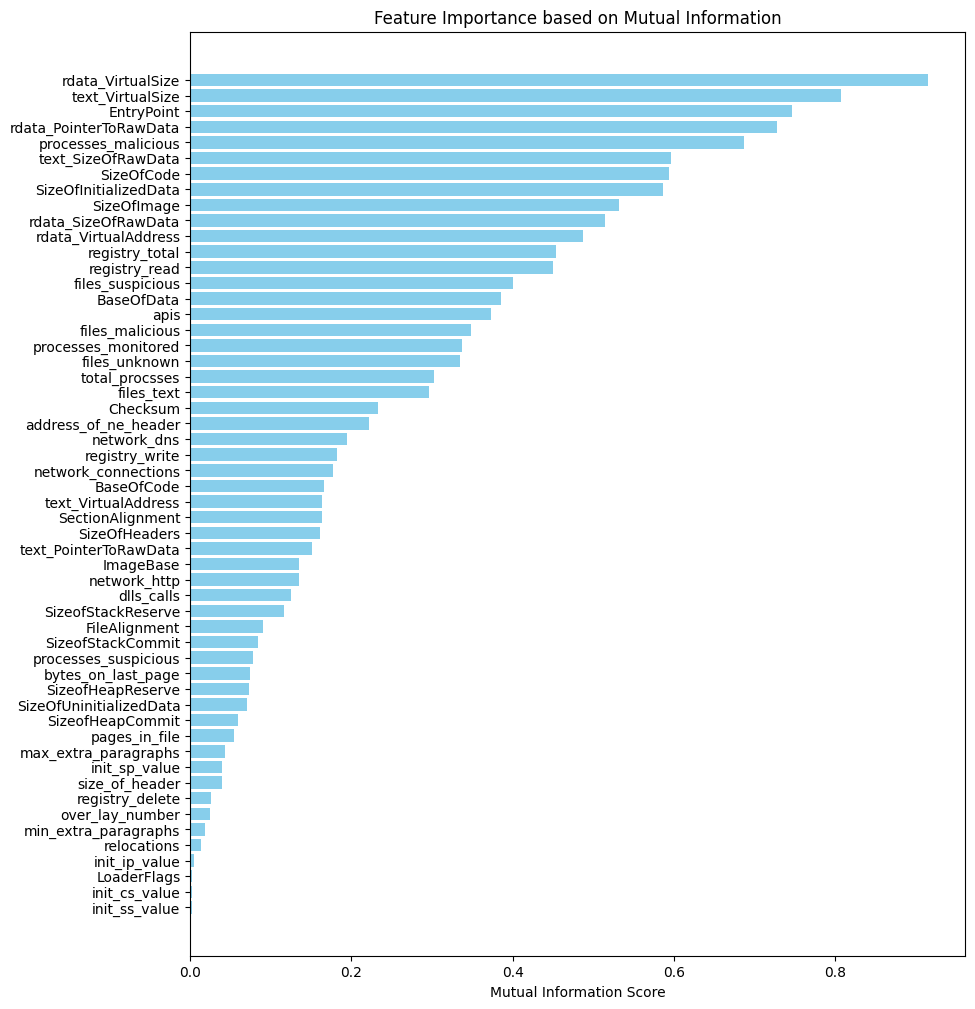

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance based on Mutual Information")
plt.gca().invert_yaxis()
plt.show()

**Wrapper Method**

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
selector = RFE(model, n_features_to_select=30)
X_new = selector.fit_transform(X,y)
print("Selected features:", selector.support_)
print("Ranking of features:", selector.ranking_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features: [ True  True False False False False  True False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True False False False False False False False
 False  True False False False False]
Ranking of features: [ 1  1  4  8  9  5  1 10  3  6  7  2 12  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 17 22  1 19 24 15 23 25 20 16
 18  1 11 13 21 14]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**DT/ RF**

Feature importances:
Feature 0 (md5): 0.0171
Feature 1 (sha1): 0.0015
Feature 2 (EntryPoint): 0.0008
Feature 3 (bytes_on_last_page): 0.0001
Feature 4 (pages_in_file): 0.0005
Feature 5 (relocations): 0.0004
Feature 6 (size_of_header): 0.0009
Feature 7 (min_extra_paragraphs): 0.0000
Feature 8 (max_extra_paragraphs): 0.0009
Feature 9 (init_ss_value): 0.0001
Feature 10 (init_sp_value): 0.0000
Feature 11 (init_ip_value): 0.0004
Feature 12 (init_cs_value): 0.0123
Feature 13 (over_lay_number): 0.0129
Feature 14 (address_of_ne_header): 0.0106
Feature 15 (SizeOfCode): 0.0046
Feature 16 (SizeOfInitializedData): 0.0036
Feature 17 (SizeOfUninitializedData): 0.0111
Feature 18 (BaseOfCode): 0.0027
Feature 19 (BaseOfData): 0.0070
Feature 20 (ImageBase): 0.0064
Feature 21 (SectionAlignment): 0.0155
Feature 22 (FileAlignment): 0.0060
Feature 23 (SizeOfImage): 0.0098
Feature 24 (SizeOfHeaders): 0.0040
Feature 25 (Checksum): 0.0048
Feature 26 (SizeofStackReserve): 0.0014
Feature 27 (SizeofStackCommit): 0

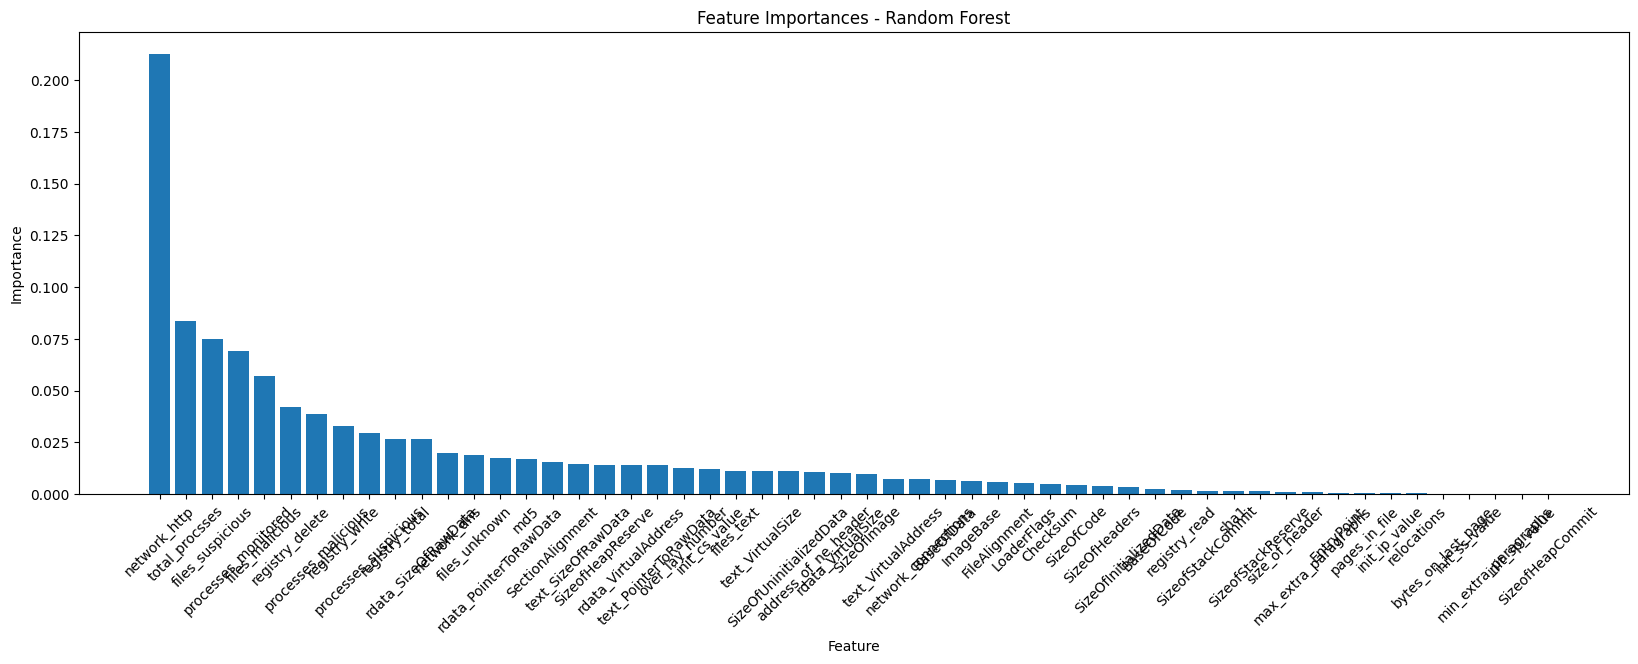

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for i in range(X.shape[1]):
    print(f"Feature {i} ({df.columns[i]}): {importances[i]:.4f}")
plt.figure(figsize=(20, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(df.columns)[indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

**Family Feature Checking**

In [54]:
df3 = df3.drop(['md5', 'sha1','Category', 'Class'], axis=1)
categorical_columns = df3.select_dtypes(include=['object', 'category']).columns
categorical_columns =[ 'Family']
df3 = pd.DataFrame(df3)

In [55]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df3[col] = label_encoder.fit_transform(df3[col])

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 30))
sns.heatmap(df3.corr(), annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Mutual Information**

In [57]:
from sklearn.feature_selection import mutual_info_classif
# Separate features and target
X = df3.drop(columns=['Family'])
y = df3['Family']
# Calculate mutual information

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

# Create a DataFrame to show results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)
print("Top Features by Mutual Information:")
print(mi_df)

Top Features by Mutual Information:
                    Feature  MI Score
0         rdata_VirtualSize  1.713249
1          text_VirtualSize  1.550200
2    rdata_PointerToRawData  1.494268
3                EntryPoint  1.463071
4        text_SizeOfRawData  1.308561
5                SizeOfCode  1.281599
6     SizeOfInitializedData  1.271460
7       rdata_SizeOfRawData  1.217710
8               SizeOfImage  1.187507
9      rdata_VirtualAddress  1.127621
10                     apis  0.980557
11               BaseOfData  0.958981
12      processes_malicious  0.926603
13            registry_read  0.861220
14           registry_total  0.859630
15         files_suspicious  0.715940
16          files_malicious  0.685215
17      processes_monitored  0.653390
18     address_of_ne_header  0.607771
19               files_text  0.586745
20                 Checksum  0.579971
21           total_procsses  0.555927
22               dlls_calls  0.504157
23            files_unknown  0.499011
24           r

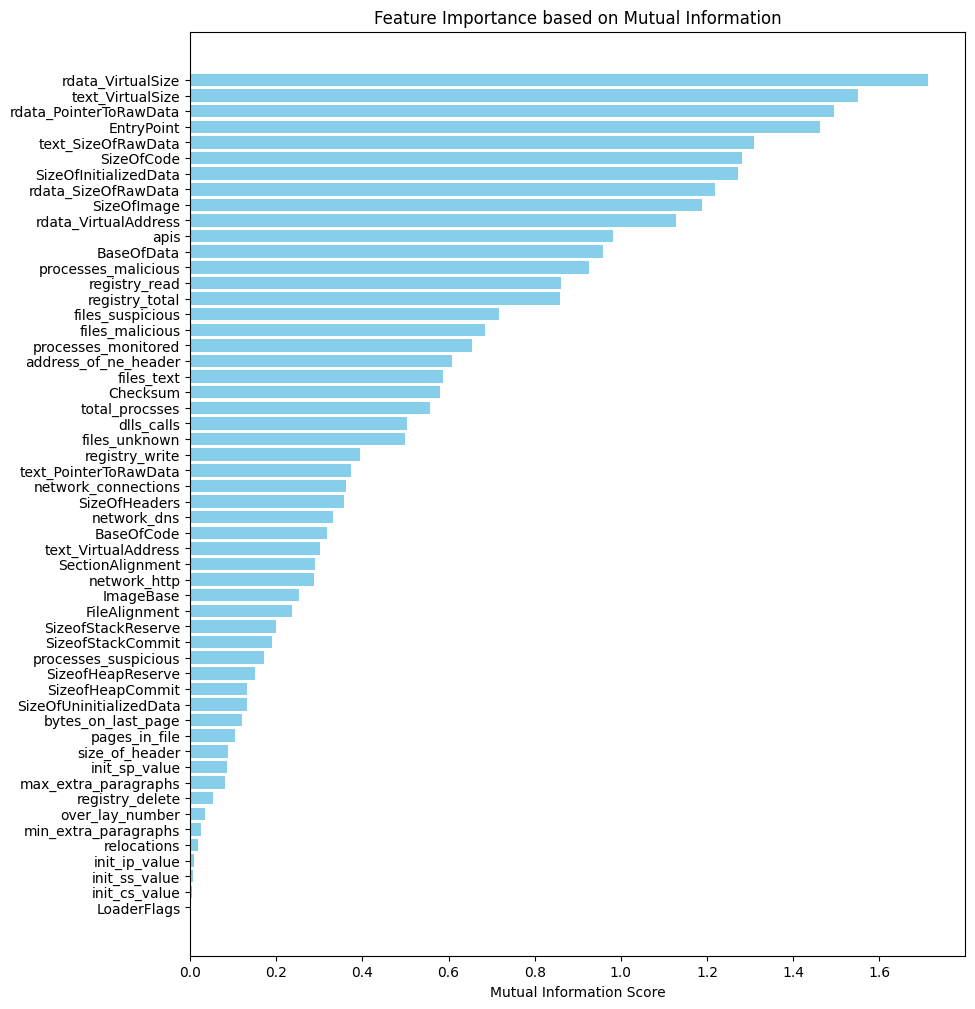

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance based on Mutual Information")
plt.gca().invert_yaxis()
plt.show()

**Wrapper Method**

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
selector = RFE(model, n_features_to_select=30)
X_new = selector.fit_transform(X,y)
print("Selected features:", selector.support_)
print("Ranking of features:", selector.ranking_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features: [ True  True False False False False  True False False False False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True False False False False False False False
 False False False False False False]
Ranking of features: [ 1  1  3  8  9  7  1 10  2  5  6  1 11  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 17 22  1 19 23 15 24 25 21 16
 18  4 12 14 20 13]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DT/RF

Feature importances:
Feature 0 (md5): 0.0229
Feature 1 (sha1): 0.0012
Feature 2 (EntryPoint): 0.0015
Feature 3 (bytes_on_last_page): 0.0001
Feature 4 (pages_in_file): 0.0002
Feature 5 (relocations): 0.0006
Feature 6 (size_of_header): 0.0002
Feature 7 (min_extra_paragraphs): 0.0001
Feature 8 (max_extra_paragraphs): 0.0002
Feature 9 (init_ss_value): 0.0001
Feature 10 (init_sp_value): 0.0001
Feature 11 (init_ip_value): 0.0005
Feature 12 (init_cs_value): 0.0222
Feature 13 (over_lay_number): 0.0177
Feature 14 (address_of_ne_header): 0.0239
Feature 15 (SizeOfCode): 0.0050
Feature 16 (SizeOfInitializedData): 0.0047
Feature 17 (SizeOfUninitializedData): 0.0143
Feature 18 (BaseOfCode): 0.0142
Feature 19 (BaseOfData): 0.0087
Feature 20 (ImageBase): 0.0138
Feature 21 (SectionAlignment): 0.0323
Feature 22 (FileAlignment): 0.0095
Feature 23 (SizeOfImage): 0.0152
Feature 24 (SizeOfHeaders): 0.0046
Feature 25 (Checksum): 0.0047
Feature 26 (SizeofStackReserve): 0.0019
Feature 27 (SizeofStackCommit): 0

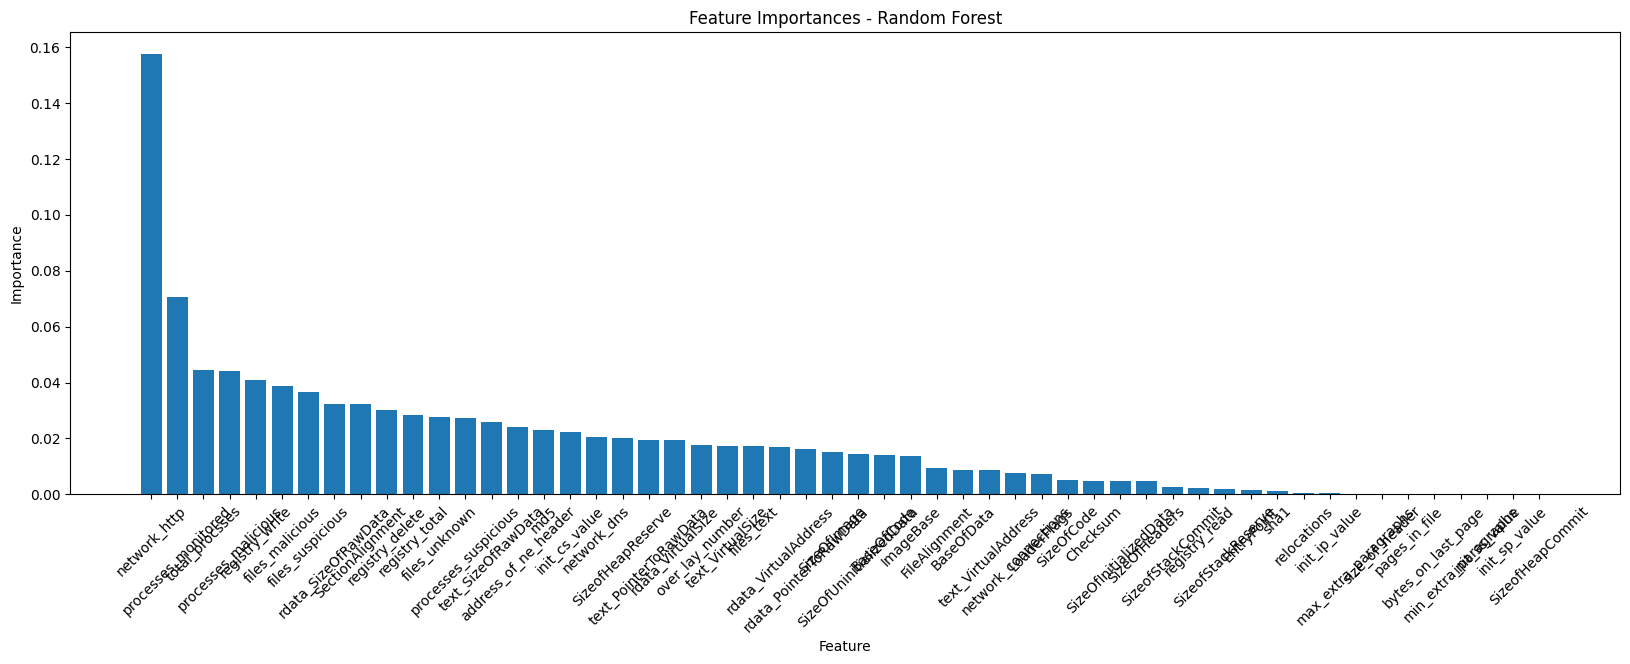

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for i in range(X.shape[1]):
    print(f"Feature {i} ({df.columns[i]}): {importances[i]:.4f}")
plt.figure(figsize=(20, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(df.columns)[indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

**Preparing dataset**

In [70]:
df4 = pd.read_csv('/content/drive/MyDrive/ML/Thesis/Dataset/AU-PEMal-2025.csv')

In [71]:
df4.shape

(21752, 59)

In [72]:
df4 = df4.drop_duplicates()

In [73]:
df4.shape

(21703, 59)

In [74]:
df4.columns

Index(['md5', 'sha1', 'EntryPoint', 'bytes_on_last_page', 'pages_in_file',
       'relocations', 'size_of_header', 'min_extra_paragraphs',
       'max_extra_paragraphs', 'init_ss_value', 'init_sp_value',
       'init_ip_value', 'init_cs_value', 'over_lay_number',
       'address_of_ne_header', 'SizeOfCode', 'SizeOfInitializedData',
       'SizeOfUninitializedData', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'SizeOfImage', 'SizeOfHeaders',
       'Checksum', 'SizeofStackReserve', 'SizeofStackCommit',
       'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags',
       'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData',
       'text_PointerToRawData', 'rdata_VirtualSize', 'rdata_VirtualAddress',
       'rdata_SizeOfRawData', 'rdata_PointerToRawData', 'registry_read',
       'registry_write', 'registry_delete', 'registry_total', 'network_dns',
       'network_http', 'network_connections', 'processes_malicious',
       'processes_susp

In [75]:
import pandas as pd

# list of selected features
selected_features = [
    "sha1",
     # Behavioral features
    "processes_malicious",
    "processes_monitored",
    "processes_suspicious",
    "total_procsses",
    "files_malicious",
    "files_suspicious",
    "files_unknown",
    "files_text",
    "registry_total",
    "registry_read",
    "registry_write",
    "registry_delete",

    # Networking features
    "network_dns",
    "network_http",
    "network_connections",

    # API/Calls
    "apis",
    "dlls_calls",

    # PE Structure features
    "EntryPoint",
    "SizeOfCode",
    "SizeOfImage",
    "SizeOfInitializedData",
    "SizeOfUninitializedData",
    "rdata_VirtualSize",
    "rdata_VirtualAddress",
    "rdata_SizeOfRawData",
    "rdata_PointerToRawData",
    "text_VirtualSize",
    "text_SizeOfRawData",
    "text_PointerToRawData",
    "BaseOfCode",
    "BaseOfData",
    "ImageBase",
    "Checksum",
    "SectionAlignment",
    "SizeOfHeaders",
    "Class",
    "Category",
    "Family"
]

# Keep only selected columns
df_selected = df4[selected_features]

# Save to new CSV file
df_selected.to_csv("/content/drive/MyDrive/ML/Thesis/Dataset/AU-PEMal-2025-V2.csv", index=False)

print("✅ New dataset saved as 'selected_features_dataset.csv' with only selected features.")


✅ New dataset saved as 'selected_features_dataset.csv' with only selected features.


In [84]:
df5 = pd.read_csv('/content/drive/MyDrive/ML/Thesis/Dataset/AU-PEMal-2025-V1.csv')
df5.shape

(21703, 39)

In [85]:
df6 = pd.read_csv('/content/drive/MyDrive/ML/Thesis/Dataset/AU-PEMal-2025-V2.csv')
df6.shape

(21703, 39)